In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## JSON to CSV

In [3]:
import json
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'

### log

In [4]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        log = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성

# 로그 데이터는 너무 많아서 예시로...파일 10개 중 5개로 한정 [len(json_files)-1 > 5]
for i in range(5):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    log = pd.concat([log, tmp])

In [16]:
log.head()

,request_date_time,account_id,device_type,product_id,before_product_id
0,2020-03-14 10:39:45,101496,M,88429694,0
1,2020-03-24 15:33:35,101496,M,64694842,0
2,2019-12-31 09:54:33,101496,M,81503945,0
3,2019-12-31 09:52:14,101496,M,84434768,0
4,2019-12-31 09:52:25,101496,M,81503945,0


In [17]:
log.shape

(24105214, 5)

In [5]:
log.to_csv(path + 'log.csv', encoding = 'utf-8-sig')

### Accounts

In [4]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        accounts = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성
for i in range(len(json_files)-1):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    accounts = pd.concat([accounts, tmp])

In [5]:
accounts.head()

,account_id,gender,age,zip_code,address,last_login_dts
0,100986,M,43.0,16512,경기도 수원시 영통구 하동 994 광교호수마을참누리레이크,1.586492e+12
1,102793,F,40.0,706-022,대구 수성구 만촌2동,1.586596e+12
2,102960,F,57.0,626-860,경남 양산시 하북면,1.575587e+12
3,105153,F,38.0,NaN,부산시 금정구 서2동,1.589554e+12
4,106535,F,45.0,06232,서울 강남구 역삼동,1.578967e+12


In [6]:
accounts.shape

(1741578, 6)

In [28]:
accounts.to_csv(path + 'accounts.csv', encoding = 'utf-8-sig')

### Products

In [7]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        products = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성
for i in range(len(json_files)-1):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    products = pd.concat([products, tmp])

In [8]:
products.head()

,product_id,product_name,category_id,published_at,shop_price,maker_name
0,43528701,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,001007,20170225,31000.00,생명의말씀사
1,43528730,바이오메디컬 엔지니어를 위한 생체 신호 측정 실습,001020,20170626,20000.00,계명대학교출판부
2,43528779,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,001007,20170225,31000.00,생명의말씀사
3,43528822,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,001007,20170225,31000.00,생명의말씀사
4,43528824,황종희가 꿈꾸는 도덕정치,001009,20170625,20000.00,서울대학교출판문화원


In [9]:
products.shape

(1745066, 6)

In [30]:
products.to_csv(path + 'products.csv', encoding = 'utf-8-sig')

###Orders

In [10]:
# files: 디렉토리 안의 파일 목록의 리스트
files = [f for f in listdir('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/') if isfile(join('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/', f))]

# json_files: 파일 목록 DataFrame
json_files = pd.DataFrame({"file_id" : files})

# 초기 dataframe 형태 잡기 [칼럼]
with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/'+json_files['file_id'][0], encoding = 'utf-8') as f:
        orders = pd.DataFrame(json.loads(line) for line in f)

# json file 목록을 읽으며
# 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
# concat를 통해 전체 데이터프레임 형성
for i in range(len(json_files)-1):
    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:
        tmp = pd.DataFrame(json.loads(line) for line in f)
    orders = pd.concat([orders, tmp])

In [11]:
orders.head()

,order_id,account_id,product_id,price,created_at
0,218519157,100777,84936431,10800.0,1585273295643
1,221364615,100777,23116461,6300.0,1588498287633
2,218519157,100777,86641767,14850.0,1585273295643
3,223489288,100777,6315392,10800.0,1591161710237
4,218519157,100777,85010480,43200.0,1585273295643


In [12]:
orders.shape

(8382514, 5)

In [29]:
orders.to_csv(path + 'orders.csv', encoding = 'utf-8-sig')

## 전처리

In [13]:
import pandas as pd
import os
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'
import numpy as np

from datetime import datetime
import datetime
from dateutil.parser import parse
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

## Accounts

In [28]:
accounts = pd.read_csv('/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/accounts.csv')
accounts.drop('Unnamed: 0', axis=1, inplace=True)
accounts.dropna(inplace=True)

#### accounts: 최근 접속 일자 변환

In [29]:
accounts['last_login_dts'] = pd.to_datetime(accounts['last_login_dts']*1000000)
accounts.dropna(inplace=True)

In [30]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669171 entries, 0 to 1741577
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1669171 non-null  int64         
 1   gender          1669171 non-null  object        
 2   age             1669171 non-null  float64       
 3   zip_code        1669171 non-null  object        
 4   address         1669171 non-null  object        
 5   last_login_dts  1669171 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 89.1+ MB


In [31]:
accounts['last_login'] = accounts['last_login_dts'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
accounts['last_login'] = pd.to_datetime(accounts['last_login'])

In [33]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669171 entries, 0 to 1741577
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1669171 non-null  int64         
 1   gender          1669171 non-null  object        
 2   age             1669171 non-null  float64       
 3   zip_code        1669171 non-null  object        
 4   address         1669171 non-null  object        
 5   last_login_dts  1669171 non-null  datetime64[ns]
 6   last_login      1669171 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 101.9+ MB


In [34]:
accounts.head()

,account_id,gender,age,zip_code,address,last_login_dts,last_login
0,100986,M,43.0,16512,경기도 수원시 영통구 하동 994 광교호수마을참누리레이크,2020-04-10 04:06:03,2020-04-10 04:06:03
1,102793,F,40.0,706-022,대구 수성구 만촌2동,2020-04-11 09:10:04,2020-04-11 09:10:04
2,102960,F,57.0,626-860,경남 양산시 하북면,2019-12-05 23:02:47,2019-12-05 23:02:47
4,106535,F,45.0,06232,서울 강남구 역삼동,2020-01-14 01:51:32,2020-01-14 01:51:32
5,106783,F,40.0,07555,서울특별시 강서구 염창동 264-27 삼성한아름아파트,2020-04-21 07:04:51,2020-04-21 07:04:51


#### accounts: gender 변환

In [35]:
accounts.gender.unique()

array(['M', 'F', '-', '0'], dtype=object)

In [36]:
accounts['gender'].replace(to_replace = '-', value = np.nan, inplace = True)
accounts['gender'].replace(to_replace = '0', value = np.nan, inplace = True)

In [37]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669169 entries, 0 to 1741577
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1669169 non-null  int64         
 1   gender          1669169 non-null  object        
 2   age             1669169 non-null  float64       
 3   zip_code        1669169 non-null  object        
 4   address         1669169 non-null  object        
 5   last_login_dts  1669169 non-null  datetime64[ns]
 6   last_login      1669169 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 101.9+ MB


In [40]:
accounts.gender.unique()

array([ 1.,  0., nan])

In [38]:
accounts['gender'] = pd.DataFrame(encoder.fit_transform(accounts['gender']))

In [39]:
accounts['gender']

0          1.0
1          0.0
2          0.0
4          0.0
5          1.0
          ... 
1741572    NaN
1741573    NaN
1741575    NaN
1741576    NaN
1741577    NaN
Name: gender, Length: 1669169, dtype: float64

In [41]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599921 entries, 0 to 1669168
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1599921 non-null  int64         
 1   gender          1599921 non-null  float64       
 2   age             1599921 non-null  float64       
 3   zip_code        1599921 non-null  object        
 4   address         1599921 non-null  object        
 5   last_login_dts  1599921 non-null  datetime64[ns]
 6   last_login      1599921 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 97.7+ MB


#### accounts: age 변환

In [42]:
accounts.age.unique()

array([ 43.,  40.,  57.,  45.,  52.,  49.,  48.,  46.,  47.,  42.,  41.,
        37.,  35.,  66.,  56.,  44.,  50.,  51.,  34.,  58.,  72.,  59.,
        53.,  36.,  74.,  54.,  55.,  61.,  39.,  63.,  38.,  32.,  69.,
        65.,  64.,  30.,  60.,  62.,  75.,  31.,  33.,  29.,  67.,  17.,
        73.,  28.,  26.,  27.,  24.,  77.,  68.,  70.,  25.,  79.,  76.,
        23.,  85.,  21.,  18.,  20.,  22.,  12.,  19.,  14.,  71.,  11.,
        15., 100.,  16.,  81.,  13.,  -1.,  86.,  10.,  80.,   8.,   9.,
        83.,  78.,  94.,  82.,  90.,  95.,  88.,   4.,  87.,  89.,  84.,
        91.,  93.,  92.,  96.,  98.,  99.,   6.,   5.,  97.,   7.,   2.,
         3.])

In [43]:
accounts['age'].replace(to_replace = -1, value = np.nan, inplace = True)
accounts['age'] = accounts['age'].apply(lambda x : np.nan if x <=7 else x)

In [44]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599751 entries, 0 to 1669168
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   account_id      1599751 non-null  int64         
 1   gender          1599751 non-null  float64       
 2   age             1599751 non-null  float64       
 3   zip_code        1599751 non-null  object        
 4   address         1599751 non-null  object        
 5   last_login_dts  1599751 non-null  datetime64[ns]
 6   last_login      1599751 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 97.6+ MB


#### accounts: 주소

In [46]:
accounts['address'][0].split(' ')[0]

'경기도'

In [45]:
accounts['address_is'] = accounts['address'].apply(lambda x: 0 if '경기' in x.split(' ')[0] else 1  if '인천' in x.split(' ')[0] else 1 if '서울' in x.split(' ')[0] else 1)

In [49]:
accounts.dropna(inplace=True)
accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599751 entries, 0 to 1669168
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   account_id  1599751 non-null  int64         
 1   gender      1599751 non-null  float64       
 2   age         1599751 non-null  float64       
 3   address     1599751 non-null  object        
 4   address_is  1599751 non-null  int64         
 5   last_login  1599751 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 85.4+ MB


#### 저장

In [47]:
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'

In [48]:
accounts = accounts[['account_id','gender','age','address','address_is','last_login']]
accounts.to_csv(path + 'accounts_preprocessed.csv',encoding='utf-8')

## Orders

In [51]:
orders = pd.read_csv(path+'orders.csv')
orders.drop('Unnamed: 0',axis=1, inplace=True)

In [59]:
orders['created_at'][0]

Timestamp('2020-03-27 01:41:36.286000')

In [56]:
java_timestamp = 1589424016190
seconds = java_timestamp / 1000
sub_seconds = (java_timestamp % 1000.0) / 1000.0
date = datetime.datetime.fromtimestamp(seconds + sub_seconds)
date

datetime.datetime(2020, 5, 14, 2, 40, 16, 380000)

In [57]:
orders['created_at'] = orders['created_at'].apply(lambda x : datetime.datetime.fromtimestamp((x/1000) + ((x % 1000.0) / 1000.0)))

In [58]:
orders

,order_id,account_id,product_id,price,created_at
0,218519157,100777,84936431,10800.0,2020-03-27 01:41:36.286
1,221364615,100777,23116461,6300.0,2020-05-03 09:31:28.266
2,218519157,100777,86641767,14850.0,2020-03-27 01:41:36.286
3,223489288,100777,6315392,10800.0,2020-06-03 05:21:50.474
4,218519157,100777,85010480,43200.0,2020-03-27 01:41:36.286
...,...,...,...,...,...
8382509,223843200,16987547,3799797,9000.0,2020-06-08 14:50:52.854
8382510,223850682,16988206,73776838,18000.0,2020-06-08 22:09:55.166
8382511,223871729,16989204,90496918,66600.0,2020-06-09 04:48:23.986
8382512,223887913,16990132,7217755,12600.0,2020-06-09 09:12:26.054


In [60]:
orders.to_csv(path+'orders_preprocessed.csv',encoding='utf-8')

## Products

In [77]:
products = pd.read_csv(path+'products.csv',dtype={'published_at':str})
products.drop('Unnamed: 0', axis=1, inplace=True)
products.dropna(inplace=True)

In [ ]:
products

,product_id,product_name,category_id,published_at,shop_price,maker_name
0,43528701,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,1007,20170225,31000.0,생명의말씀사
1,43528730,바이오메디컬 엔지니어를 위한 생체 신호 측정 실습,1020,20170626,20000.0,계명대학교출판부
2,43528779,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,1007,20170225,31000.0,생명의말씀사
3,43528822,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,1007,20170225,31000.0,생명의말씀사
4,43528824,황종희가 꿈꾸는 도덕정치,1009,20170625,20000.0,서울대학교출판문화원
...,...,...,...,...,...,...
1745061,85352665,2020 임성래의 쉽게 쓴 품질경영기사 필기,1001,20200106,39000.0,성안당
1745062,85353942,파고다 HSK 5급 종합서 최신 개정판,1011,20200102,22000.0,PAGODA Books
1745063,85354052,2020 고시넷 2주완성 사회조사분석사 2급 필기,1001,20200110,23000.0,고시넷
1745064,85354327,이시원의 영어 대모험 1 : 인칭대명사,1027,20200108,12000.0,아울북


In [78]:
products['published_at'] = products['published_at'].apply(lambda x : x[0:8] if type(x) == 'str' else x)

In [80]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
dtype: int64

In [105]:
products.published_at.value_counts()

20100501    14243
20101005    13467
20110501    13456
20100801     7511
20110801     7298
            ...  
19931108        1
19870505        1
19701231        1
19921110        1
19981228        1
Name: published_at, Length: 9406, dtype: int64

In [86]:
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if len(x) <8 else x)
products['published_at'] = products['published_at'].astype(str)
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if int(x[4:6]) >= 13 else x )
products['published_at'] = products['published_at'].apply(lambda x : '20111205' if x=='2011125 ' else x)
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if int(x) <= 19000000 else x)

In [107]:
products['published_at'] = products['published_at'].apply(lambda x : parse(x) )

In [115]:
products

,product_id,product_name,category_id,published_at,shop_price,maker_name
0,43528701,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,007,2017-02-25 00:00:00,31000.0,생명의말씀사
1,43528730,바이오메디컬 엔지니어를 위한 생체 신호 측정 실습,020,2017-06-26 00:00:00,20000.0,계명대학교출판부
2,43528779,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,007,2017-02-25 00:00:00,31000.0,생명의말씀사
3,43528822,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,007,2017-02-25 00:00:00,31000.0,생명의말씀사
4,43528824,황종희가 꿈꾸는 도덕정치,009,2017-06-25 00:00:00,20000.0,서울대학교출판문화원
...,...,...,...,...,...,...
1745061,85352665,2020 임성래의 쉽게 쓴 품질경영기사 필기,001,2020-01-06 00:00:00,39000.0,성안당
1745062,85353942,파고다 HSK 5급 종합서 최신 개정판,011,2020-01-02 00:00:00,22000.0,PAGODA Books
1745063,85354052,2020 고시넷 2주완성 사회조사분석사 2급 필기,001,2020-01-10 00:00:00,23000.0,고시넷
1745064,85354327,이시원의 영어 대모험 1 : 인칭대명사,027,2020-01-08 00:00:00,12000.0,아울북


In [108]:
products['category_id'] = products['category_id'].apply(lambda x : str(x)[1:])

In [116]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
dtype: int64

In [117]:
products.to_csv(path+'products_preprocessed.csv',encoding='utf-8')

## click

In [118]:
click = pd.read_csv(path+'log.csv')
click.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
print(click.shape)
click.head()

(30113602, 5)


,request_date_time,account_id,device_type,product_id,before_product_id
0,2020-03-14 10:39:45,101496,M,88429694,0
1,2020-03-24 15:33:35,101496,M,64694842,0
2,2019-12-31 09:54:33,101496,M,81503945,0
3,2019-12-31 09:52:14,101496,M,84434768,0
4,2019-12-31 09:52:25,101496,M,81503945,0


In [14]:
click['device_type'] = pd.DataFrame(encoder.fit_transform(click['device_type']))

In [15]:
click.head()

,request_date_time,account_id,device_type,product_id,before_product_id
0,2020-03-14 10:39:45,101496,0,88429694,0
1,2020-03-24 15:33:35,101496,0,64694842,0
2,2019-12-31 09:54:33,101496,0,81503945,0
3,2019-12-31 09:52:14,101496,0,84434768,0
4,2019-12-31 09:52:25,101496,0,81503945,0


In [16]:
click.isnull().sum()

request_date_time    0
account_id           0
device_type          0
product_id           0
before_product_id    0
dtype: int64

In [17]:
click.to_csv(path+'click.csv',encoding='utf-8')

## click 중심 데이터 > orders 중 click없이 구매한 데이터(외부 사이트 이용) 삭제하기
* click 데이터 크기가 방대하여 절반만 사용한 관계로 더 적어짐

In [23]:
orders = pd.read_csv(path+'orders_preprocessed.csv',encoding='utf-8')

In [18]:
order_check_account = click['account_id'].unique().tolist()
order_check_product = click['product_id'].unique().tolist()

In [19]:
order_check_account[:10]

[101496,
 103496,
 104986,
 106002,
 107608,
 108157,
 111343,
 111537,
 112568,
 115150]

In [20]:
order_check_product[:10]

[88429694,
 64694842,
 81503945,
 84434768,
 86895523,
 60713828,
 2870072,
 69240128,
 72158875,
 61557835]

In [24]:
orders.shape

(8382514, 6)

In [25]:
order_check_1 = orders[orders['product_id'].isin(order_check_product)]

In [26]:
order_check_1.shape

(8344774, 6)

In [27]:
order_check_2 = order_check_1[order_check_1['account_id'].isin(order_check_account)]

In [30]:
order_check_2.shape

(4035057, 5)

In [29]:
order_check_2 = order_check_2.iloc[:,1:]

In [31]:
order_check_2.to_csv(path+'orders_only_in_clicks.csv',encoding='utf-8')

## 기타 전처리

In [67]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import os
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'
import numpy as np

from datetime import datetime
import datetime
from dateutil.parser import parse
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

### 신구 선호도_orders 3,4/5

In [17]:
products = pd.read_csv(path+'products_preprocessed.csv',dtype={'category_id':str})
products.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
products['published_at'] = products['published_at'].apply(lambda x: str(x))

In [19]:
products.published_at[0][0:4]

'2017'

In [20]:
products['pub_newold'] = products['published_at'].apply(lambda x: 1 if x[0:4] == '2020' else 0)

In [21]:
products.dropna(inplace=True)

In [22]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
pub_newold      0
dtype: int64

In [38]:
orders = pd.read_csv(path+'orders_only_in_clicks.csv')
orders.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
orders

,order_id,account_id,product_id,price,created_at
0,222798861,104533,89967507,48600.0,2020-05-24 13:16:05.020
1,217109953,104533,234373,18000.0,2020-03-11 13:59:53.880
2,220523812,106728,38972963,12600.0,2020-04-21 08:15:15.880
3,220523812,106728,69645132,9000.0,2020-04-21 08:15:15.880
4,216465952,106728,8157957,13320.0,2020-03-04 09:19:32.886
...,...,...,...,...,...
4035052,223483054,16953846,80316984,13320.0,2020-06-03 03:43:53.934
4035053,223483054,16953846,90224643,11700.0,2020-06-03 03:43:53.934
4035054,223229840,16957506,74404574,24300.0,2020-05-31 00:30:02.794
4035055,223264662,16959433,89340888,10800.0,2020-05-31 11:21:13.040


In [40]:
orders['created_at']= orders['created_at'].astype('datetime64[ns]')

In [41]:
orders['created_at'][0].date()

datetime.date(2020, 5, 24)

In [42]:
train_date = datetime.date(2020, 4, 30)

In [43]:
orders['train'] = orders['created_at'].apply(lambda x: np.nan if x.date() > train_date else x)

In [44]:
orders

,order_id,account_id,product_id,price,created_at,train
0,222798861,104533,89967507,48600.0,2020-05-24 13:16:05.020,NaT
1,217109953,104533,234373,18000.0,2020-03-11 13:59:53.880,2020-03-11 13:59:53.880
2,220523812,106728,38972963,12600.0,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
3,220523812,106728,69645132,9000.0,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
4,216465952,106728,8157957,13320.0,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
...,...,...,...,...,...,...
4035052,223483054,16953846,80316984,13320.0,2020-06-03 03:43:53.934,NaT
4035053,223483054,16953846,90224643,11700.0,2020-06-03 03:43:53.934,NaT
4035054,223229840,16957506,74404574,24300.0,2020-05-31 00:30:02.794,NaT
4035055,223264662,16959433,89340888,10800.0,2020-05-31 11:21:13.040,NaT


In [45]:
orders_train = orders.dropna()

In [46]:
orders_train

,order_id,account_id,product_id,price,created_at,train
1,217109953,104533,234373,18000.0,2020-03-11 13:59:53.880,2020-03-11 13:59:53.880
2,220523812,106728,38972963,12600.0,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
3,220523812,106728,69645132,9000.0,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
4,216465952,106728,8157957,13320.0,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
5,216465952,106728,57920512,9900.0,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
...,...,...,...,...,...,...
4034973,221116360,16830266,78696213,15750.0,2020-04-29 05:49:28.040,2020-04-29 05:49:28.040
4034974,221164923,16834484,90047753,4500.0,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086
4034975,221164923,16834484,24262537,7920.0,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086
4034976,221164923,16834484,43830706,8400.0,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086


In [47]:
orders_products_train = pd.merge(orders_train, products, on='product_id',how='left')

In [48]:
orders_products_train.isnull().sum()

order_id           0
account_id         0
product_id         0
price              0
created_at         0
train              0
product_name    1144
category_id     1144
published_at    1144
shop_price      1144
maker_name      1144
pub_newold      1144
dtype: int64

In [49]:
orders_products_train.dropna(inplace=True)

In [50]:
preference = pd.DataFrame(orders_products_train.groupby('account_id')['pub_newold'].agg('mean'))
preference.reset_index(inplace=True)
preference.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [51]:
preference.new_preference.value_counts()

0.000000    345852
1.000000     97044
0.500000     45135
0.333333     27971
0.250000     18622
             ...  
0.106061         1
0.963855         1
0.891892         1
0.109375         1
0.438202         1
Name: new_preference, Length: 957, dtype: int64

In [52]:
preference

,account_id,new_preference
0,100004,0.000000
1,100033,0.333333
2,100039,0.083333
3,100058,0.000000
4,100062,0.000000
...,...,...
656493,16837769,1.000000
656494,16837782,0.000000
656495,16837788,0.000000
656496,16837801,0.000000


In [53]:
orders_preference_train = pd.merge(orders_train, preference, on='account_id', how='left')

In [54]:
orders_preference_train

,order_id,account_id,product_id,price,created_at,train,new_preference
0,217109953,104533,234373,18000.0,2020-03-11 13:59:53.880,2020-03-11 13:59:53.880,0.000000
1,220523812,106728,38972963,12600.0,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880,0.000000
2,220523812,106728,69645132,9000.0,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880,0.000000
3,216465952,106728,8157957,13320.0,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886,0.000000
4,216465952,106728,57920512,9900.0,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886,0.000000
...,...,...,...,...,...,...,...
2814978,221116360,16830266,78696213,15750.0,2020-04-29 05:49:28.040,2020-04-29 05:49:28.040,0.000000
2814979,221164923,16834484,90047753,4500.0,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086,0.333333
2814980,221164923,16834484,24262537,7920.0,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086,0.333333
2814981,221164923,16834484,43830706,8400.0,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086,0.333333


In [56]:
orders['test'] = orders['created_at'].apply(lambda x: np.nan if x.date() < train_date else x)

In [57]:
orders_test = orders.drop('train',axis=1)
orders_test.dropna(inplace=True)

In [58]:
orders_test

,order_id,account_id,product_id,price,created_at,test
0,222798861,104533,89967507,48600.0,2020-05-24 13:16:05.020,2020-05-24 13:16:05.020
15,222615397,111175,23821489,15750.0,2020-05-21 11:58:16.834,2020-05-21 11:58:16.834
19,221290735,112001,58047183,5400.0,2020-05-02 01:46:14.146,2020-05-02 01:46:14.146
20,221290735,112001,6117482,9000.0,2020-05-02 01:46:14.146,2020-05-02 01:46:14.146
21,221257972,123138,90041754,9900.0,2020-05-01 09:57:41.120,2020-05-01 09:57:41.120
...,...,...,...,...,...,...
4035052,223483054,16953846,80316984,13320.0,2020-06-03 03:43:53.934,2020-06-03 03:43:53.934
4035053,223483054,16953846,90224643,11700.0,2020-06-03 03:43:53.934,2020-06-03 03:43:53.934
4035054,223229840,16957506,74404574,24300.0,2020-05-31 00:30:02.794,2020-05-31 00:30:02.794
4035055,223264662,16959433,89340888,10800.0,2020-05-31 11:21:13.040,2020-05-31 11:21:13.040


In [59]:
orders_products_test = pd.merge(orders_test, products, on='product_id',how='left')

In [60]:
orders_products_test.isnull().sum()

order_id          0
account_id        0
product_id        0
price             0
created_at        0
test              0
product_name    592
category_id     592
published_at    592
shop_price      592
maker_name      592
pub_newold      592
dtype: int64

In [61]:
orders_products_test.dropna(inplace=True)

In [62]:
preference_test = pd.DataFrame(orders_products_test.groupby('account_id')['pub_newold'].agg('mean'))
preference_test.reset_index(inplace=True)
preference_test.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [63]:
orders_preference_test = pd.merge(orders_test, preference_test, on='account_id', how='left')

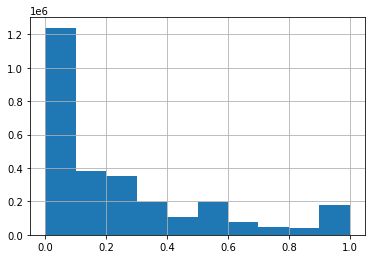

In [65]:
orders_preference_train.new_preference.hist()

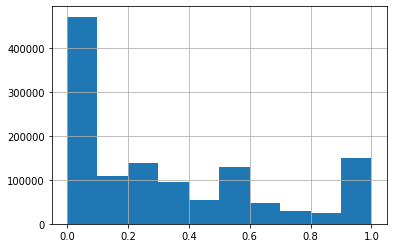

In [64]:
orders_preference_test.new_preference.hist()

In [68]:
orders_preference_train['new_pref'] = orders_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
orders_preference_test['new_pref'] = orders_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [71]:
orders_preference_train.to_csv(path+'orders_preference_train.csv',encoding='utf-8')
orders_preference_test.to_csv(path+'orders_preference_test.csv',encoding='utf-8')

### 신구 선호도_click 3,4 / 5

In [3]:
click = pd.read_csv(path+'click.csv')
click.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
click

,request_date_time,account_id,device_type,product_id,before_product_id
0,2020-03-14 10:39:45,101496,0,88429694,0
1,2020-03-24 15:33:35,101496,0,64694842,0
2,2019-12-31 09:54:33,101496,0,81503945,0
3,2019-12-31 09:52:14,101496,0,84434768,0
4,2019-12-31 09:52:25,101496,0,81503945,0
...,...,...,...,...,...
30113597,2020-05-30 19:41:49,16956026,0,81689059,0
30113598,2020-05-30 19:41:37,16956026,0,78601025,0
30113599,2020-05-30 20:53:51,16956257,0,71741943,0
30113600,2020-05-31 13:42:35,16958127,0,89108278,0


In [8]:
click['request_date_time'] = click['request_date_time'].astype('datetime64[ns]')

In [10]:
start = datetime.date(2020, 3, 1)
train = datetime.date(2020, 5, 1)

In [11]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < start else x )

In [12]:
click.dropna(inplace=True)

In [13]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() >= train else x )
click['test'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < train else x )

In [14]:
click

,request_date_time,account_id,device_type,product_id,before_product_id,train,test
0,2020-03-14 10:39:45,101496,0,88429694,0,2020-03-14 10:39:45,NaT
1,2020-03-24 15:33:35,101496,0,64694842,0,2020-03-24 15:33:35,NaT
5,2020-03-14 10:38:03,101496,0,86895523,0,2020-03-14 10:38:03,NaT
18,2020-05-03 19:42:23,101496,0,89851054,0,NaT,2020-05-03 19:42:23
20,2020-03-24 15:37:17,101496,0,89309569,0,2020-03-24 15:37:17,NaT
...,...,...,...,...,...,...,...
30113597,2020-05-30 19:41:49,16956026,0,81689059,0,NaT,2020-05-30 19:41:49
30113598,2020-05-30 19:41:37,16956026,0,78601025,0,NaT,2020-05-30 19:41:37
30113599,2020-05-30 20:53:51,16956257,0,71741943,0,NaT,2020-05-30 20:53:51
30113600,2020-05-31 13:42:35,16958127,0,89108278,0,NaT,2020-05-31 13:42:35


In [15]:
click_train = click.drop('test', axis=1)
click_train.dropna(inplace=True)

In [16]:
click_test = click.drop('train',axis=1)
click_test.dropna(inplace=True)

In [23]:
click_product_train = pd.merge(click_train,products,on='product_id',how='left')
click_product_train.dropna(inplace=True)

In [24]:
click_product_test = pd.merge(click_test,products,on='product_id',how='left')
click_product_test.dropna(inplace=True)

In [25]:
click_product_train

,request_date_time,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold
0,2020-03-14 10:39:45,101496,0,88429694,0,2020-03-14 10:39:45,먼 바다,033,2020-02-17 00:00:00,15800.0,해냄,1.0
1,2020-03-24 15:33:35,101496,0,64694842,0,2020-03-24 15:33:35,당신이 옳다,014,2018-10-10 00:00:00,15800.0,해냄,0.0
2,2020-03-14 10:38:03,101496,0,86895523,0,2020-03-14 10:38:03,날씨가 좋으면 찾아가겠어요,033,2020-02-01 00:00:00,13800.0,시공사,1.0
3,2020-03-24 15:37:17,101496,0,89309569,0,2020-03-24 15:37:17,더 해빙 The Having,022,2020-03-01 00:00:00,16000.0,수오서재,1.0
4,2020-03-25 08:49:08,101496,0,71923011,0,2020-03-25 08:49:08,여행의 이유,034,2019-04-17 00:00:00,13500.0,문학동네,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12855272,2020-04-30 10:52:32,16831095,0,7480625,7480625,2020-04-30 10:52:32,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.0,동양북스(동양books),0.0
12855273,2020-04-29 19:08:00,16831095,0,7480625,0,2020-04-29 19:08:00,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.0,동양북스(동양books),0.0
12855274,2020-04-29 22:33:41,16833112,0,90071962,0,2020-04-29 22:33:41,맥심 MAXIM B형 (월간) : 5월 [2020],010,2020-04-23 00:00:00,6600.0,와이미디어,1.0
12855275,2020-04-30 12:01:19,16833112,0,90071997,0,2020-04-30 12:01:19,카구야 님은 고백 받고 싶어 15,008,2020-04-24 00:00:00,5500.0,학산문화사,1.0


In [29]:
preference_train = pd.DataFrame(click_product_train.groupby('account_id')['pub_newold'].agg('mean'))
preference_train.reset_index(inplace=True)
preference_train.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [30]:
preference_test = pd.DataFrame(click_product_test.groupby('account_id')['pub_newold'].agg('mean'))
preference_test.reset_index(inplace=True)
preference_test.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [31]:
preference_train

,account_id,new_preference
0,100004,0.090909
1,100033,0.400000
2,100039,0.173913
3,100058,0.250000
4,100062,0.136364
...,...,...
682062,16837187,0.500000
682063,16837199,1.000000
682064,16837200,0.000000
682065,16837210,0.000000


In [32]:
click_preference_train = pd.merge(click_product_train,preference_train, on='account_id',how='left')

In [34]:
click_preference_test = pd.merge(click_product_test,preference_test, on='account_id',how='left')

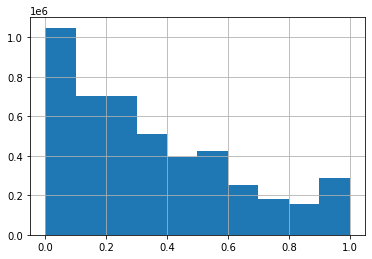

In [35]:
click_preference_test.new_preference.hist()

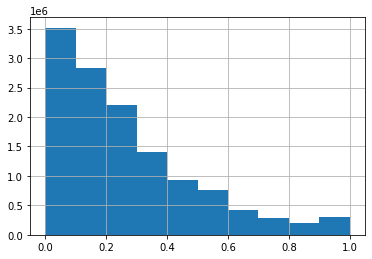

In [37]:
click_preference_train.new_preference.hist()

In [69]:
click_preference_train['new_pref'] = click_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
click_preference_test['new_pref'] = click_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [70]:
click_preference_train.to_csv(path+'click_preference_train.csv',encoding='utf-8')
click_preference_test.to_csv(path+'click_preference_test.csv',encoding='utf-8')

### 카테고리 선호도

In [100]:
click_preference_train

,request_date_time,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference,new_pref
0,2020-03-14 10:39:45,101496,0,88429694,0,2020-03-14 10:39:45,먼 바다,033,2020-02-17 00:00:00,15800.00,해냄,1.00,0.38,0
1,2020-03-24 15:33:35,101496,0,64694842,0,2020-03-24 15:33:35,당신이 옳다,014,2018-10-10 00:00:00,15800.00,해냄,0.00,0.38,0
2,2020-03-14 10:38:03,101496,0,86895523,0,2020-03-14 10:38:03,날씨가 좋으면 찾아가겠어요,033,2020-02-01 00:00:00,13800.00,시공사,1.00,0.38,0
3,2020-03-24 15:37:17,101496,0,89309569,0,2020-03-24 15:37:17,더 해빙 The Having,022,2020-03-01 00:00:00,16000.00,수오서재,1.00,0.38,0
4,2020-03-25 08:49:08,101496,0,71923011,0,2020-03-25 08:49:08,여행의 이유,034,2019-04-17 00:00:00,13500.00,문학동네,0.00,0.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848209,2020-04-30 10:52:32,16831095,0,7480625,7480625,2020-04-30 10:52:32,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.00,동양북스(동양books),0.00,0.00,0
12848210,2020-04-29 19:08:00,16831095,0,7480625,0,2020-04-29 19:08:00,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.00,동양북스(동양books),0.00,0.00,0
12848211,2020-04-29 22:33:41,16833112,0,90071962,0,2020-04-29 22:33:41,맥심 MAXIM B형 (월간) : 5월 [2020],010,2020-04-23 00:00:00,6600.00,와이미디어,1.00,1.00,1
12848212,2020-04-30 12:01:19,16833112,0,90071997,0,2020-04-30 12:01:19,카구야 님은 고백 받고 싶어 15,008,2020-04-24 00:00:00,5500.00,학산문화사,1.00,1.00,1


In [101]:
click_preference_test

,request_date_time,account_id,device_type,product_id,before_product_id,test,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference,new_pref
0,2020-05-03 19:42:23,101496,0,89851054,0,2020-05-03 19:42:23,2020 제11회 젊은작가상 수상작품집,033,2020-04-08 00:00:00,5500.00,문학동네,1.00,0.50,1
1,2020-05-08 20:38:39,101496,0,4052128,4052128,2020-05-08 20:38:39,입체도형 팝업카드 만들기,023,2012-05-30 00:00:00,15000.00,두베,0.00,0.50,1
2,2020-05-03 19:49:32,101496,0,16777296,0,2020-05-03 19:49:32,그래도 괜찮은 하루,034,2015-02-23 00:00:00,12800.00,위즈덤하우스,0.00,0.50,1
3,2020-05-03 19:47:30,101496,0,89827405,0,2020-05-03 19:47:30,밤은 이야기하기 좋은 시간이니까요,034,2020-03-31 00:00:00,15000.00,위즈덤하우스,1.00,0.50,1
4,2020-05-03 19:42:58,101496,0,90082148,0,2020-05-03 19:42:58,좋은 말씀,034,2020-05-08 00:00:00,17000.00,시공사,1.00,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668092,2020-05-30 19:41:49,16956026,0,81689059,0,2020-05-30 19:41:49,만화 그녀가 공작저로 가야 했던 사정 2 한정판,008,2019-11-25 00:00:00,23000.00,디앤씨미디어(D&C미디어),0.00,0.00,0
4668093,2020-05-30 19:41:37,16956026,0,78601025,0,2020-05-30 19:41:37,나츠메 우인장 24,008,2019-09-10 00:00:00,5000.00,학산문화사,0.00,0.00,0
4668094,2020-05-30 20:53:51,16956257,0,71741943,0,2020-05-30 20:53:51,"대학물리학 Ⅰ, Ⅱ 세트",004,2019-03-05 00:00:00,48000.00,북스힐,0.00,0.00,0
4668095,2020-05-31 13:42:35,16958127,0,89108278,0,2020-05-31 13:42:35,원펀맨 ONE PUNCH MAN 21,008,2020-02-19 00:00:00,5000.00,대원,1.00,1.00,1


### 활동시간

In [102]:
click_preference_train

,request_date_time,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference,new_pref
0,2020-03-14 10:39:45,101496,0,88429694,0,2020-03-14 10:39:45,먼 바다,033,2020-02-17 00:00:00,15800.00,해냄,1.00,0.38,0
1,2020-03-24 15:33:35,101496,0,64694842,0,2020-03-24 15:33:35,당신이 옳다,014,2018-10-10 00:00:00,15800.00,해냄,0.00,0.38,0
2,2020-03-14 10:38:03,101496,0,86895523,0,2020-03-14 10:38:03,날씨가 좋으면 찾아가겠어요,033,2020-02-01 00:00:00,13800.00,시공사,1.00,0.38,0
3,2020-03-24 15:37:17,101496,0,89309569,0,2020-03-24 15:37:17,더 해빙 The Having,022,2020-03-01 00:00:00,16000.00,수오서재,1.00,0.38,0
4,2020-03-25 08:49:08,101496,0,71923011,0,2020-03-25 08:49:08,여행의 이유,034,2019-04-17 00:00:00,13500.00,문학동네,0.00,0.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848209,2020-04-30 10:52:32,16831095,0,7480625,7480625,2020-04-30 10:52:32,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.00,동양북스(동양books),0.00,0.00,0
12848210,2020-04-29 19:08:00,16831095,0,7480625,0,2020-04-29 19:08:00,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.00,동양북스(동양books),0.00,0.00,0
12848211,2020-04-29 22:33:41,16833112,0,90071962,0,2020-04-29 22:33:41,맥심 MAXIM B형 (월간) : 5월 [2020],010,2020-04-23 00:00:00,6600.00,와이미디어,1.00,1.00,1
12848212,2020-04-30 12:01:19,16833112,0,90071997,0,2020-04-30 12:01:19,카구야 님은 고백 받고 싶어 15,008,2020-04-24 00:00:00,5500.00,학산문화사,1.00,1.00,1


In [103]:
click_preference_test

,request_date_time,account_id,device_type,product_id,before_product_id,test,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference,new_pref
0,2020-05-03 19:42:23,101496,0,89851054,0,2020-05-03 19:42:23,2020 제11회 젊은작가상 수상작품집,033,2020-04-08 00:00:00,5500.00,문학동네,1.00,0.50,1
1,2020-05-08 20:38:39,101496,0,4052128,4052128,2020-05-08 20:38:39,입체도형 팝업카드 만들기,023,2012-05-30 00:00:00,15000.00,두베,0.00,0.50,1
2,2020-05-03 19:49:32,101496,0,16777296,0,2020-05-03 19:49:32,그래도 괜찮은 하루,034,2015-02-23 00:00:00,12800.00,위즈덤하우스,0.00,0.50,1
3,2020-05-03 19:47:30,101496,0,89827405,0,2020-05-03 19:47:30,밤은 이야기하기 좋은 시간이니까요,034,2020-03-31 00:00:00,15000.00,위즈덤하우스,1.00,0.50,1
4,2020-05-03 19:42:58,101496,0,90082148,0,2020-05-03 19:42:58,좋은 말씀,034,2020-05-08 00:00:00,17000.00,시공사,1.00,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668092,2020-05-30 19:41:49,16956026,0,81689059,0,2020-05-30 19:41:49,만화 그녀가 공작저로 가야 했던 사정 2 한정판,008,2019-11-25 00:00:00,23000.00,디앤씨미디어(D&C미디어),0.00,0.00,0
4668093,2020-05-30 19:41:37,16956026,0,78601025,0,2020-05-30 19:41:37,나츠메 우인장 24,008,2019-09-10 00:00:00,5000.00,학산문화사,0.00,0.00,0
4668094,2020-05-30 20:53:51,16956257,0,71741943,0,2020-05-30 20:53:51,"대학물리학 Ⅰ, Ⅱ 세트",004,2019-03-05 00:00:00,48000.00,북스힐,0.00,0.00,0
4668095,2020-05-31 13:42:35,16958127,0,89108278,0,2020-05-31 13:42:35,원펀맨 ONE PUNCH MAN 21,008,2020-02-19 00:00:00,5000.00,대원,1.00,1.00,1


### 접속 기기

In [104]:
click_preference_train

,request_date_time,account_id,device_type,product_id,before_product_id,train,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference,new_pref
0,2020-03-14 10:39:45,101496,0,88429694,0,2020-03-14 10:39:45,먼 바다,033,2020-02-17 00:00:00,15800.00,해냄,1.00,0.38,0
1,2020-03-24 15:33:35,101496,0,64694842,0,2020-03-24 15:33:35,당신이 옳다,014,2018-10-10 00:00:00,15800.00,해냄,0.00,0.38,0
2,2020-03-14 10:38:03,101496,0,86895523,0,2020-03-14 10:38:03,날씨가 좋으면 찾아가겠어요,033,2020-02-01 00:00:00,13800.00,시공사,1.00,0.38,0
3,2020-03-24 15:37:17,101496,0,89309569,0,2020-03-24 15:37:17,더 해빙 The Having,022,2020-03-01 00:00:00,16000.00,수오서재,1.00,0.38,0
4,2020-03-25 08:49:08,101496,0,71923011,0,2020-03-25 08:49:08,여행의 이유,034,2019-04-17 00:00:00,13500.00,문학동네,0.00,0.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848209,2020-04-30 10:52:32,16831095,0,7480625,7480625,2020-04-30 10:52:32,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.00,동양북스(동양books),0.00,0.00,0
12848210,2020-04-29 19:08:00,16831095,0,7480625,0,2020-04-29 19:08:00,New 스타일 일본어 2,011,2012-09-05 00:00:00,13500.00,동양북스(동양books),0.00,0.00,0
12848211,2020-04-29 22:33:41,16833112,0,90071962,0,2020-04-29 22:33:41,맥심 MAXIM B형 (월간) : 5월 [2020],010,2020-04-23 00:00:00,6600.00,와이미디어,1.00,1.00,1
12848212,2020-04-30 12:01:19,16833112,0,90071997,0,2020-04-30 12:01:19,카구야 님은 고백 받고 싶어 15,008,2020-04-24 00:00:00,5500.00,학산문화사,1.00,1.00,1


In [105]:
click_preference_test

,request_date_time,account_id,device_type,product_id,before_product_id,test,product_name,category_id,published_at,shop_price,maker_name,pub_newold,new_preference,new_pref
0,2020-05-03 19:42:23,101496,0,89851054,0,2020-05-03 19:42:23,2020 제11회 젊은작가상 수상작품집,033,2020-04-08 00:00:00,5500.00,문학동네,1.00,0.50,1
1,2020-05-08 20:38:39,101496,0,4052128,4052128,2020-05-08 20:38:39,입체도형 팝업카드 만들기,023,2012-05-30 00:00:00,15000.00,두베,0.00,0.50,1
2,2020-05-03 19:49:32,101496,0,16777296,0,2020-05-03 19:49:32,그래도 괜찮은 하루,034,2015-02-23 00:00:00,12800.00,위즈덤하우스,0.00,0.50,1
3,2020-05-03 19:47:30,101496,0,89827405,0,2020-05-03 19:47:30,밤은 이야기하기 좋은 시간이니까요,034,2020-03-31 00:00:00,15000.00,위즈덤하우스,1.00,0.50,1
4,2020-05-03 19:42:58,101496,0,90082148,0,2020-05-03 19:42:58,좋은 말씀,034,2020-05-08 00:00:00,17000.00,시공사,1.00,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4668092,2020-05-30 19:41:49,16956026,0,81689059,0,2020-05-30 19:41:49,만화 그녀가 공작저로 가야 했던 사정 2 한정판,008,2019-11-25 00:00:00,23000.00,디앤씨미디어(D&C미디어),0.00,0.00,0
4668093,2020-05-30 19:41:37,16956026,0,78601025,0,2020-05-30 19:41:37,나츠메 우인장 24,008,2019-09-10 00:00:00,5000.00,학산문화사,0.00,0.00,0
4668094,2020-05-30 20:53:51,16956257,0,71741943,0,2020-05-30 20:53:51,"대학물리학 Ⅰ, Ⅱ 세트",004,2019-03-05 00:00:00,48000.00,북스힐,0.00,0.00,0
4668095,2020-05-31 13:42:35,16958127,0,89108278,0,2020-05-31 13:42:35,원펀맨 ONE PUNCH MAN 21,008,2020-02-19 00:00:00,5000.00,대원,1.00,1.00,1


### 나이

In [76]:
accounts = pd.read_csv(path+'accounts_preprocessed.csv')
accounts.drop('Unnamed: 0', axis=1, inplace=True)

In [79]:
accounts

,account_id,gender,age,address,address_is,last_login
0,100986,1.00,43.00,경기도 수원시 영통구 하동 994 광교호수마을참누리레이크,0,2020-04-10 04:06:03
1,102793,0.00,40.00,대구 수성구 만촌2동,1,2020-04-11 09:10:04
2,102960,0.00,57.00,경남 양산시 하북면,1,2019-12-05 23:02:47
3,106535,0.00,45.00,서울 강남구 역삼동,1,2020-01-14 01:51:32
4,106783,1.00,40.00,서울특별시 강서구 염창동 264-27 삼성한아름아파트,1,2020-04-21 07:04:51
...,...,...,...,...,...,...
1599746,11124898,0.00,33.00,경기도 파주시 광탄면 마장리 7-2,0,2020-05-28 00:10:52
1599747,11126427,1.00,43.00,경기도 수원시 권선구 권선동 권선자이e편한세상아파트,0,2020-05-20 06:15:05
1599748,11129947,1.00,23.00,전라북도 군산시 지곡동,1,2020-02-04 11:32:23
1599749,11131300,0.00,21.00,경상남도 사천시 벌룡동 44-3 리센츠빌 (1동),1,2020-05-08 07:29:31


### 관여도

In [92]:
click_train

,request_date_time,account_id,device_type,product_id,before_product_id,train
0,2020-03-14 10:39:45,101496,0,88429694,0,2020-03-14 10:39:45
1,2020-03-24 15:33:35,101496,0,64694842,0,2020-03-24 15:33:35
5,2020-03-14 10:38:03,101496,0,86895523,0,2020-03-14 10:38:03
20,2020-03-24 15:37:17,101496,0,89309569,0,2020-03-24 15:37:17
21,2020-03-25 08:49:08,101496,0,71923011,0,2020-03-25 08:49:08
...,...,...,...,...,...,...
30112792,2020-04-30 10:52:32,16831095,0,7480625,7480625,2020-04-30 10:52:32
30112795,2020-04-29 19:08:00,16831095,0,7480625,0,2020-04-29 19:08:00
30112801,2020-04-29 22:33:41,16833112,0,90071962,0,2020-04-29 22:33:41
30112802,2020-04-30 12:01:19,16833112,0,90071997,0,2020-04-30 12:01:19


In [93]:
click_test

,request_date_time,account_id,device_type,product_id,before_product_id,test
18,2020-05-03 19:42:23,101496,0,89851054,0,2020-05-03 19:42:23
26,2020-05-08 20:38:39,101496,0,4052128,4052128,2020-05-08 20:38:39
27,2020-05-03 19:49:32,101496,0,16777296,0,2020-05-03 19:49:32
36,2020-05-03 19:47:30,101496,0,89827405,0,2020-05-03 19:47:30
39,2020-05-03 19:42:58,101496,0,90082148,0,2020-05-03 19:42:58
...,...,...,...,...,...,...
30113597,2020-05-30 19:41:49,16956026,0,81689059,0,2020-05-30 19:41:49
30113598,2020-05-30 19:41:37,16956026,0,78601025,0,2020-05-30 19:41:37
30113599,2020-05-30 20:53:51,16956257,0,71741943,0,2020-05-30 20:53:51
30113600,2020-05-31 13:42:35,16958127,0,89108278,0,2020-05-31 13:42:35


In [99]:
orders_train

,order_id,account_id,product_id,price,created_at,train
1,217109953,104533,234373,18000.00,2020-03-11 13:59:53.880,2020-03-11 13:59:53.880
2,220523812,106728,38972963,12600.00,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
3,220523812,106728,69645132,9000.00,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
4,216465952,106728,8157957,13320.00,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
5,216465952,106728,57920512,9900.00,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
...,...,...,...,...,...,...
4034973,221116360,16830266,78696213,15750.00,2020-04-29 05:49:28.040,2020-04-29 05:49:28.040
4034974,221164923,16834484,90047753,4500.00,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086
4034975,221164923,16834484,24262537,7920.00,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086
4034976,221164923,16834484,43830706,8400.00,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086


In [85]:
orders_test

,order_id,account_id,product_id,price,created_at,test
0,222798861,104533,89967507,48600.00,2020-05-24 13:16:05.020,2020-05-24 13:16:05.020
15,222615397,111175,23821489,15750.00,2020-05-21 11:58:16.834,2020-05-21 11:58:16.834
19,221290735,112001,58047183,5400.00,2020-05-02 01:46:14.146,2020-05-02 01:46:14.146
20,221290735,112001,6117482,9000.00,2020-05-02 01:46:14.146,2020-05-02 01:46:14.146
21,221257972,123138,90041754,9900.00,2020-05-01 09:57:41.120,2020-05-01 09:57:41.120
...,...,...,...,...,...,...
4035052,223483054,16953846,80316984,13320.00,2020-06-03 03:43:53.934,2020-06-03 03:43:53.934
4035053,223483054,16953846,90224643,11700.00,2020-06-03 03:43:53.934,2020-06-03 03:43:53.934
4035054,223229840,16957506,74404574,24300.00,2020-05-31 00:30:02.794,2020-05-31 00:30:02.794
4035055,223264662,16959433,89340888,10800.00,2020-05-31 11:21:13.040,2020-05-31 11:21:13.040


### bestseller